### Neural network training using Keras

In [1]:
# Import numpy library
import numpy as np 

# Import Keras from Tensorflow
from tensorflow import keras
from tensorflow.keras import layers

# Import Matplotlib
import matplotlib as mpl 
import matplotlib.pyplot as plt 

# Make the graphics appear directly within the Jupyter notebook
%matplotlib inline

In [2]:
steps = 500;

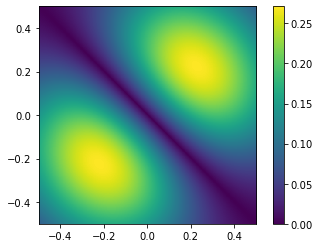

In [3]:
# the function we want to have (desired outcome)
def myFunc(x0,x1):
    r2 = x0**2+x1**2
    return(np.exp(-5*r2)*np.abs(x1+x0))

xrange = np.linspace(-0.5,0.5,steps)
X0,X1 = np.meshgrid(xrange,xrange)
plt.imshow(myFunc(X0,X1), interpolation='nearest', origin='lower', extent=[-0.5, 0.5, -0.5, 0.5])
plt.colorbar()
plt.show()

In [4]:
# pick 'batchsize' random positions in the 2D square
def make_batch():
    global batchsize

    inputs = np.random.uniform(low = -0.5, high = +0.5, size = [batchsize,2])
    targets = np.zeros([batchsize,1]) # must have right dimensions
    targets[:,0] = myFunc(inputs[:,0],inputs[:,1])
    return (inputs,targets)

In [5]:
# Defining a network 
net = keras.Sequential()

In [6]:
# Adding layers - add method 
net.add(layers.Dense(150, input_shape=(2,), activation = 'relu')) # 1st layer: 150 neurons - in the first layer, input_shape is mandatory
net.add(layers.Dense(150, activation = 'relu'))                   # 2nd layer: 150 neurons
net.add(layers.Dense(100, activation = 'relu'))                   # 3rd layer: 100 neurons 
net.add(layers.Dense(1, activation = 'relu'))                     # 4th layer: 1 neuron 

In [7]:
# Compliling the network: what's the cost function? How do I want to proceed in training? 
# In the previous step, we have only defined a NN from a symbolic point of view; with .compile, we initialise the NN

opt = keras.optimizers.SGD(learning_rate = 0.1)
net.compile(loss = 'mean_squared_error', optimizer = opt, metrics = ['accuracy'])

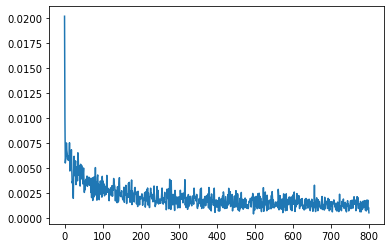

In [8]:
# Now: the training! (and plot the cost function)
# NOTE: The Keras cost function is twice as large as our cost function [ours was 0.5*(average distance squared)]

batchsize=20
batches=800
costs=np.zeros(batches)

for k in range(batches):
    y_in, y_target = make_batch()
    costs[k] = net.train_on_batch(y_in,y_target)[0]

plt.plot(costs)
plt.show()

In [9]:
# Predicting with the network 
y_out = net.predict_on_batch(y_in)

In [ ]:
# Showing the image produced with the NN 

In [10]:
# Step 1: creation of the 2D coordinates 
x_tr = np.arange(-0.5, 0.5, 1./steps)
y_tr = np.arange(-0.5, 0.5, 1./steps)
X_tr, Y_tr = np.meshgrid(x_tr, y_tr)
XY_tr = np.array([X_tr.flatten(),Y_tr.flatten()]).T 
print(XY_tr)

[[-0.5   -0.5  ]
 [-0.498 -0.5  ]
 [-0.496 -0.5  ]
 ...
 [ 0.494  0.498]
 [ 0.496  0.498]
 [ 0.498  0.498]]


In [11]:
# Step 2: prediction using the trained NN 
nn_output = net.predict(XY_tr)
print('The length of the NN output is:', len(nn_output))
print(' ')
print('Its square root is:', np.sqrt(len(nn_output)))

The length of the NN output is: 250000
 
Its square root is: 500.0


In [12]:
# Step 3: reshape of the output Numpy array 
nn_output_2D = np.reshape(nn_output, (steps, steps), order = 'F')

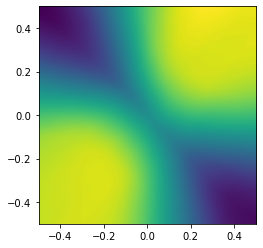

In [14]:
# Step 4: Plot the image of the reconstructed function 
plt.imshow(nn_output_2D, interpolation='nearest', origin='lower', extent=[-0.5, 0.5, -0.5, 0.5])